# Modelling Gasoline Price Prediction
Time Series is a time dependant method that analyses a collection of data points at constant time intervals. There are 3 components of Time Series; trends, seasonality, heterodaskisity. It is a very practical method to forecast a group of observations on a single entity over time.In many Time Series, there are seasonality trends, e.g. variations to a specific time frame. For instance, if you see the prices of stock value of skiing equipments flactuates over time, you would expect to find higher prices during Winter seasons...

In [1]:
# Import relevant libraries and packages.
import os
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# For all our visualization needs.
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from collections import Counter
import missingno as msno
from scipy import stats
import datetime
import time
import warnings
#ignore warning messages to ensure clean outputs
warnings.filterwarnings('ignore')

# Loading and Handling Time Series in Pandas

In [2]:
df= pd.read_csv('GasolinePrice.csv')
df.head()

,Date,"Branded Fuel- Distribution Costs, Marketing Costs, and Profits",Branded Fuel- Crude Oil Cost,Branded Fuel- Refinery Costs and Profits,Branded Fuel- State Underground Storage Tank Fee:,Branded Fuel- State and Local Sales Tax,Branded Fuel- State Excise Tax,Branded Fuel- Federal Excise Tax,Branded Fuel- Average Retail prices,Unnamed: 9,"Unbranded Fuel- Distribution Costs, Marketing Costs, and Profits",Unbranded Fuel- Crude Oil Cost,Unbranded Fuel- Refinery Costs and Profits,Unbranded Fuel- State Underground Storage Tank Fee:,Unbranded Fuel- State and Local Sales Tax,Unbranded Fuel- State Excise Tax,Unbranded Fuel- Federal Excise Tax,Unbranded Fuel- Average Retail prices
0,1/4/1999,$0.14,$0.25,$0.29,$0.00,$0.08,$0.18,$0.18,$1.13,NaN,$0.20,$0.25,$0.23,$0.00,$0.08,$0.18,$0.18,$1.13
1,1/11/1999,$0.15,$0.27,$0.26,$0.00,$0.08,$0.18,$0.18,$1.13,NaN,$0.20,$0.27,$0.21,$0.00,$0.08,$0.18,$0.18,$1.13
2,1/18/1999,$0.14,$0.25,$0.28,$0.00,$0.08,$0.18,$0.18,$1.12,NaN,$0.23,$0.25,$0.20,$0.00,$0.08,$0.18,$0.18,$1.12
3,1/25/1999,$0.15,$0.25,$0.26,$0.00,$0.08,$0.18,$0.18,$1.12,NaN,$0.22,$0.25,$0.20,$0.00,$0.08,$0.18,$0.18,$1.12
4,2/1/1999,$0.15,$0.26,$0.26,$0.00,$0.08,$0.18,$0.18,$1.11,NaN,$0.18,$0.26,$0.22,$0.00,$0.08,$0.18,$0.18,$1.11


In [3]:
df.shape

(1228, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Date                                                              1228 non-null   object 
 1   Branded Fuel- Distribution Costs, Marketing Costs, and Profits    1228 non-null   object 
 2   Branded Fuel- Crude Oil Cost                                      1228 non-null   object 
 3   Branded Fuel- Refinery Costs and Profits                          1228 non-null   object 
 4   Branded Fuel- State Underground Storage Tank Fee:                 1228 non-null   object 
 5   Branded Fuel- State and Local Sales Tax                           1228 non-null   object 
 6   Branded Fuel- State Excise Tax                                    1228 non-null   object 
 7   Branded Fuel- Federal Excise Tax 

In [5]:
df.dtypes

Date                                                                 object
Branded Fuel- Distribution Costs, Marketing Costs, and Profits       object
Branded Fuel- Crude Oil Cost                                         object
Branded Fuel- Refinery Costs and Profits                             object
Branded Fuel- State Underground Storage Tank Fee:                    object
Branded Fuel- State and Local Sales Tax                              object
Branded Fuel- State Excise Tax                                       object
Branded Fuel- Federal Excise Tax                                     object
Branded Fuel- Average Retail prices                                  object
Unnamed: 9                                                          float64
Unbranded Fuel- Distribution Costs, Marketing Costs, and Profits     object
Unbranded Fuel- Crude Oil Cost                                       object
Unbranded Fuel- Refinery Costs and Profits                           object
Unbranded Fu

In [3]:
#selecting the data
df=df[['Date', 'Branded Fuel- Average Retail prices']]

In [7]:
df.head()

,Date,Branded Fuel- Average Retail prices
0,1/4/1999,$1.13
1,1/11/1999,$1.13
2,1/18/1999,$1.12
3,1/25/1999,$1.12
4,2/1/1999,$1.11


In [4]:
# convert the datetime object value to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Year'] = df['Date'].apply(lambda t: t.year)
df['Month'] = df['Date'].apply(lambda t: t.month)
df['Week'] = df['Date'].apply(lambda t: t.week)

In [6]:
df.set_index("Date", inplace=True)

In [7]:
# convert the columns from dollar value to integer
df[df.columns[0:]] = df[df.columns[0:]].replace('[(\$,)]', '', regex=True).astype(float)

In [12]:
df.head()

,Branded Fuel- Average Retail prices,Year,Month,Week
Date,,,,
1999-01-04,1.13,1999.0,1.0,1.0
1999-01-11,1.13,1999.0,1.0,2.0
1999-01-18,1.12,1999.0,1.0,3.0
1999-01-25,1.12,1999.0,1.0,4.0
1999-02-01,1.11,1999.0,2.0,5.0


In [13]:
df.dtypes

Branded Fuel- Average Retail prices    float64
Year                                   float64
Month                                  float64
Week                                   float64
dtype: object

In [14]:
#Check if there is any missing data
df.isna().sum()

Branded Fuel- Average Retail prices    0
Year                                   0
Month                                  0
Week                                   0
dtype: int64

In [8]:
#renaming the target column
df.rename(columns={"Branded Fuel- Average Retail prices": "Price"}, inplace=True)

In [16]:
df.head()

,Price,Year,Month,Week
Date,,,,
1999-01-04,1.13,1999.0,1.0,1.0
1999-01-11,1.13,1999.0,1.0,2.0
1999-01-18,1.12,1999.0,1.0,3.0
1999-01-25,1.12,1999.0,1.0,4.0
1999-02-01,1.11,1999.0,2.0,5.0


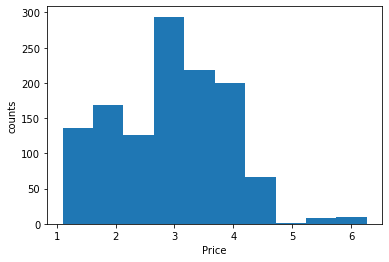

In [17]:
# Making a histogram of the Price variable.
plt.hist(df['Price'])
plt.xlabel('Price')
plt.ylabel('counts')
plt.show()

In [18]:
# Get a basic statistical summary of the variable 
df['Price'].describe()

count    1228.000000
mean        2.940936
std         0.955552
min         1.100000
25%         2.147500
50%         3.040000
75%         3.620000
max         6.270000
Name: Price, dtype: float64

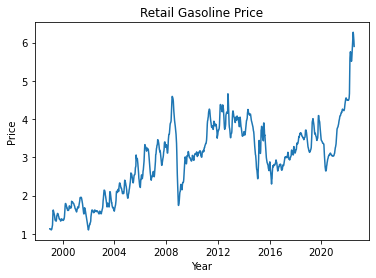

In [19]:
#visualizing the data
plt.plot(df.index, df.Price)
plt.title('Retail Gasoline Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

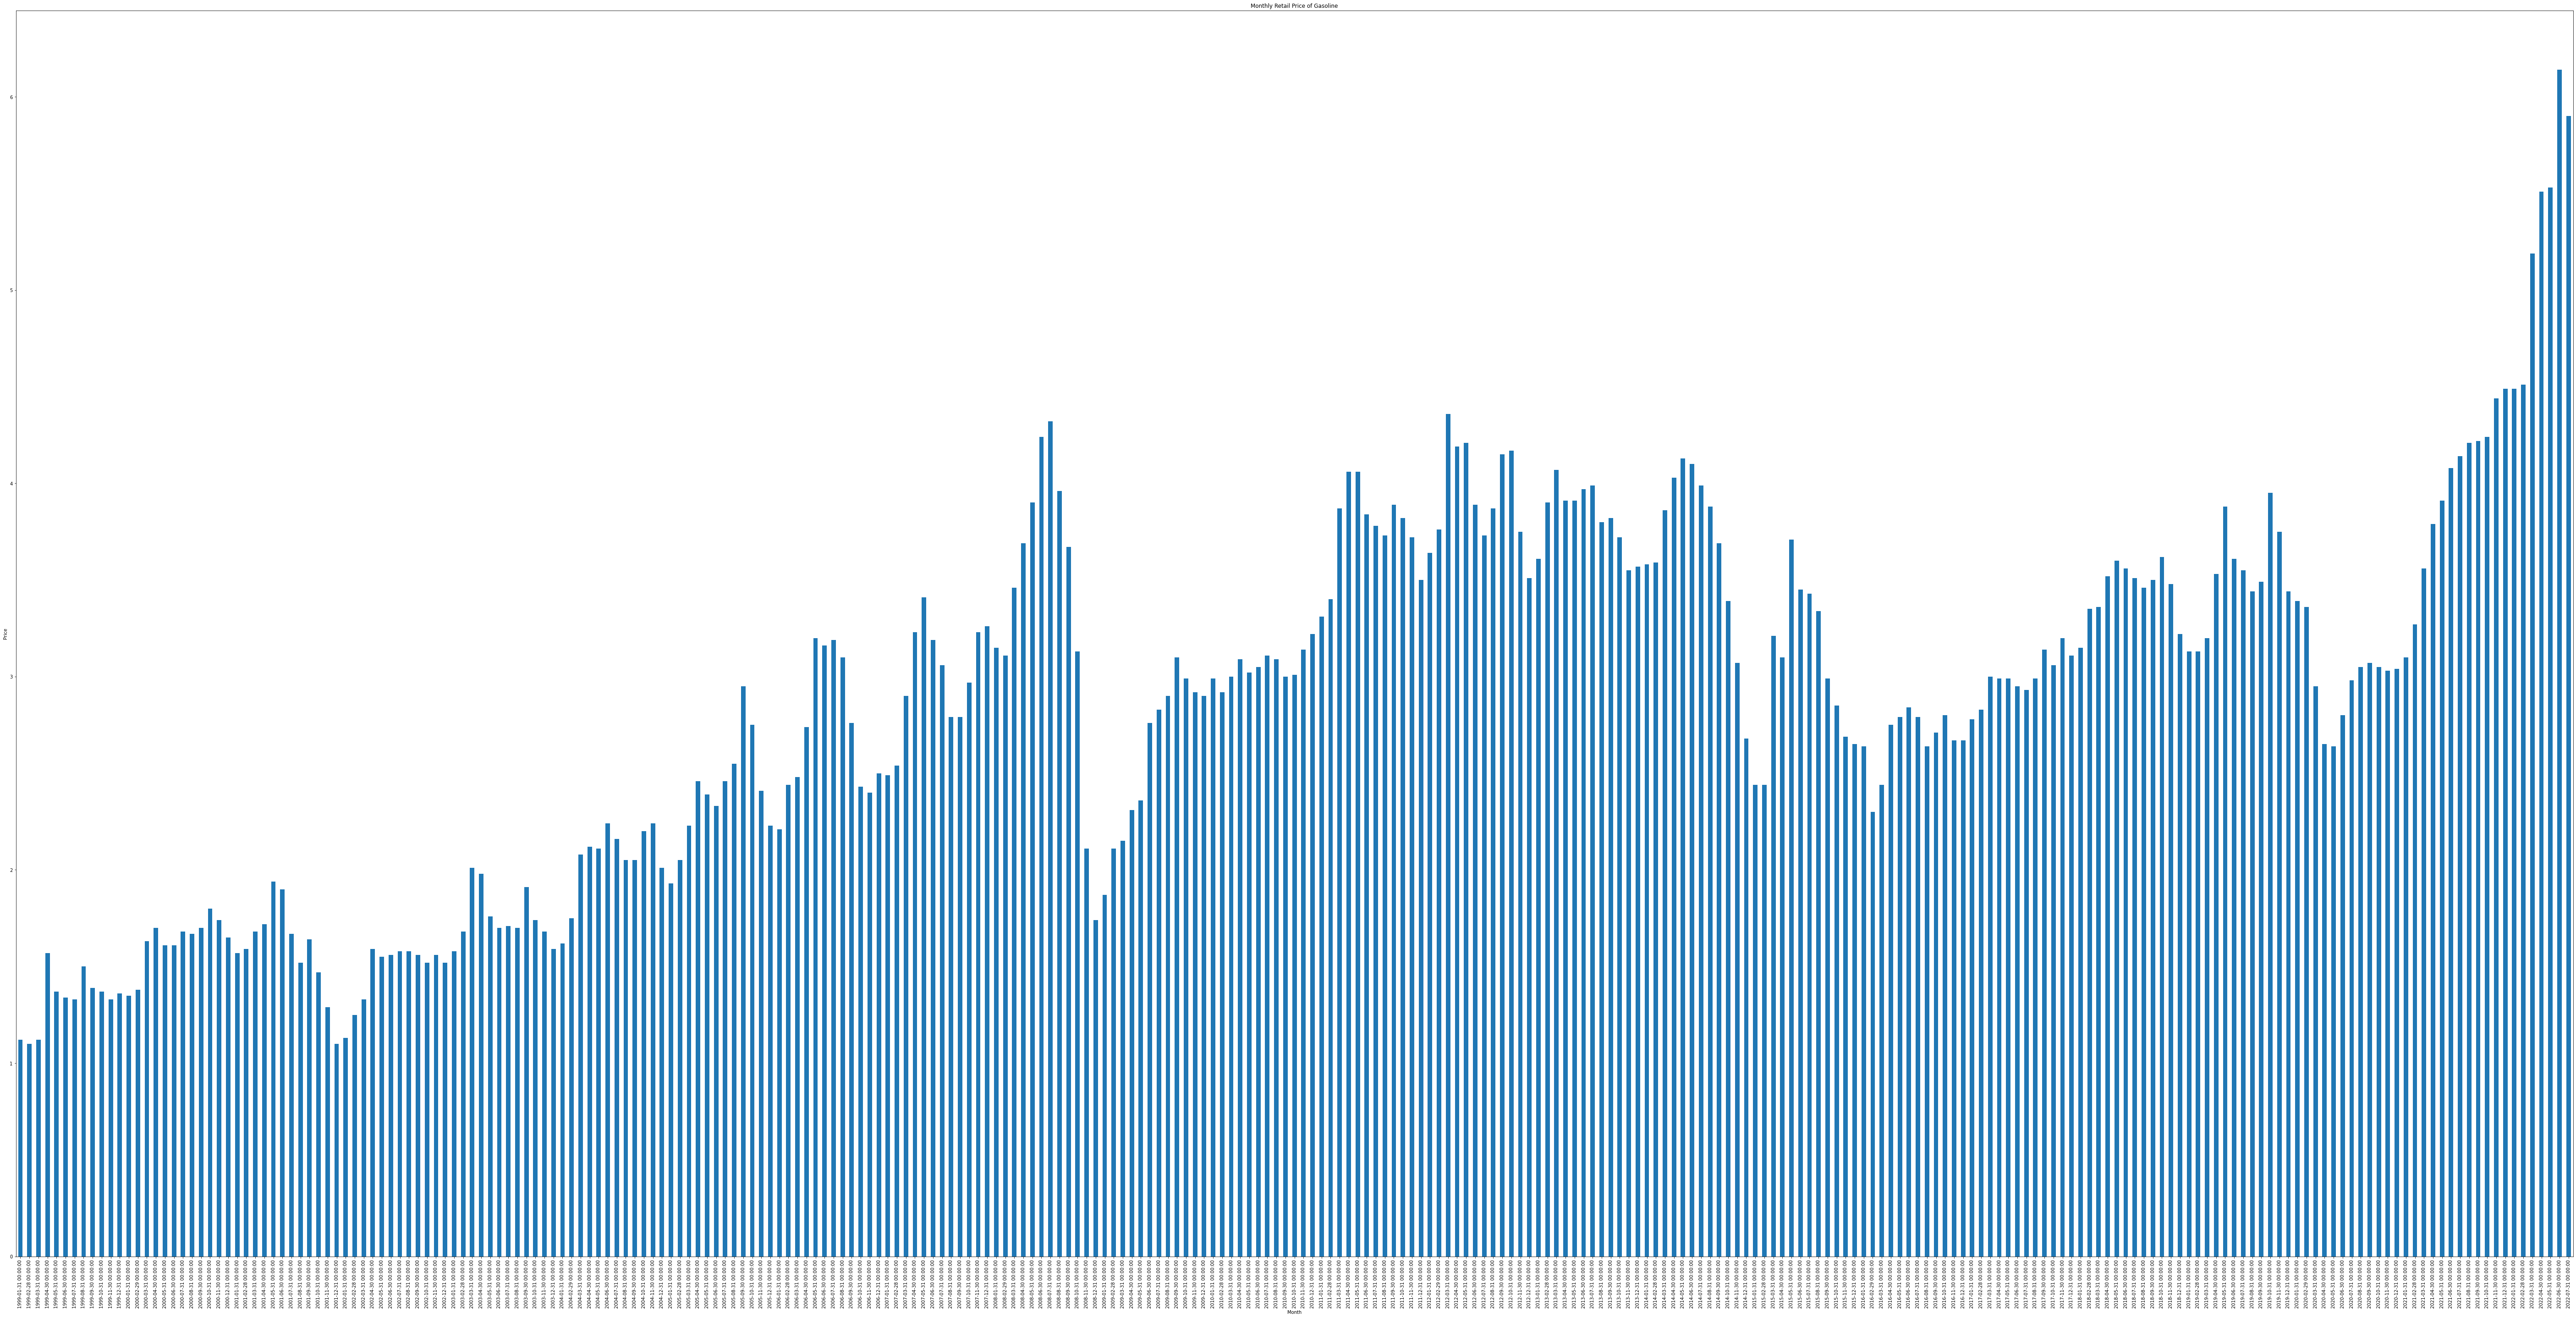

In [20]:
df['Price'].resample(rule='M').min().plot(kind='bar', figsize=(100,50))
plt.title("Monthly Retail Price of Gasoline") 
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

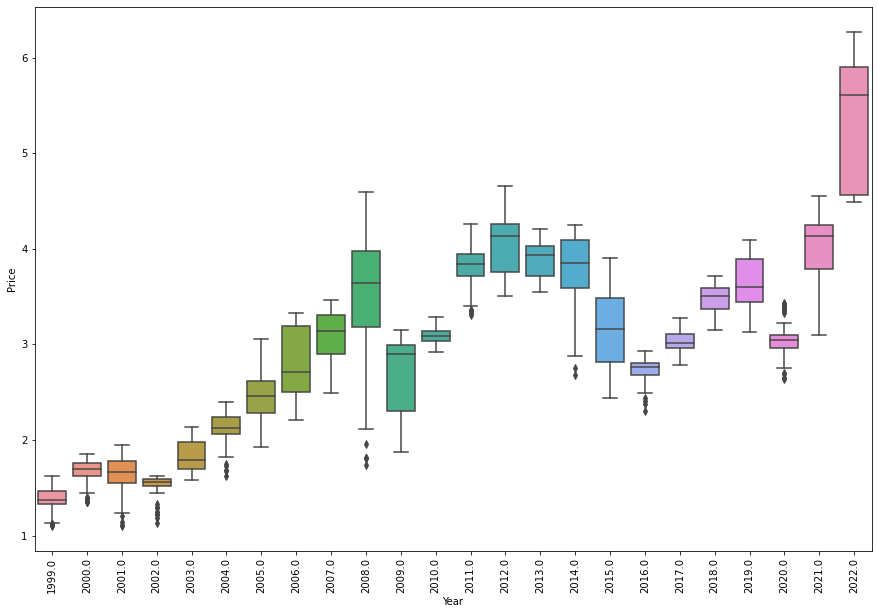

In [21]:
#boxplot for identifying outliers
plt.figure(figsize=(15,10))
_ = sns.boxplot(x='Year', y='Price',
data=df)
_ = plt.xlabel('Year')
_ = plt.ylabel('Price')
_=plt.xticks(rotation = 90)
plt.show()

# Stationarity

In [22]:
# checking the stationarity of the data by using adfuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df['Price'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.253607
p-value                           0.650121
#Lags Used                       14.000000
Number of Observations Used    1213.000000
Critical Value (1%)              -3.435752
Critical Value (5%)              -2.863926
Critical Value (10%)             -2.568040
dtype: float64


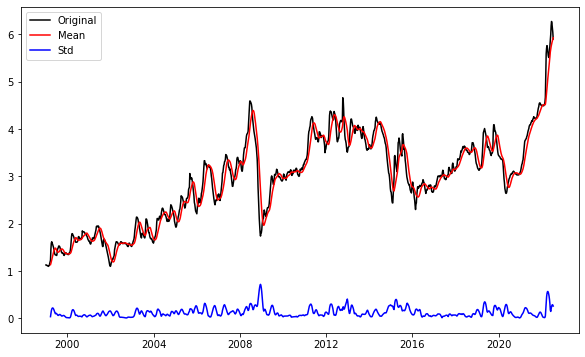

In [23]:
# plot mean and std
plt.figure(figsize=(10,6))
rolmean = df['Price'].rolling(window=12).mean()
rolstd = df['Price'].rolling(window=12).std()
orig = plt.plot(df['Price'], color='black', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)

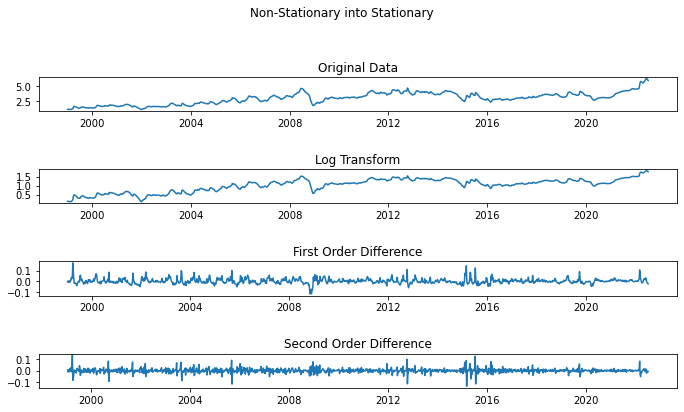

In [24]:
# Calculating and visualizing the difference

fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(10,6))
fig.suptitle('Non-Stationary into Stationary')
# Gasoline price data as a non-stationary
ax1.plot(df['Price'])

# Log Transform
ax2.plot(np.log(df['Price']))

# First Order Difference
ax3.plot(np.log(df['Price']).diff().dropna())

# Second Order Difference
ax4.plot(np.log(df['Price']).diff().diff().dropna())

ax1.title.set_text('Original Data')
ax2.title.set_text('Log Transform')
ax3.title.set_text('First Order Difference')
ax4.title.set_text('Second Order Difference')

fig.tight_layout(pad=2.5)
plt.show()

In [25]:
stationary_df= np.log(df['Price']).diff().dropna()
test_stationarity(stationary_df)

Results of Dickey-Fuller Test:
Test Statistic                -1.100949e+01
p-value                        6.378553e-20
#Lags Used                     9.000000e+00
Number of Observations Used    1.217000e+03
Critical Value (1%)           -3.435735e+00
Critical Value (5%)           -2.863918e+00
Critical Value (10%)          -2.568036e+00
dtype: float64


In [9]:
y=df['Price']

In [10]:
y_log=np.log(y)

<AxesSubplot:xlabel='Date'>

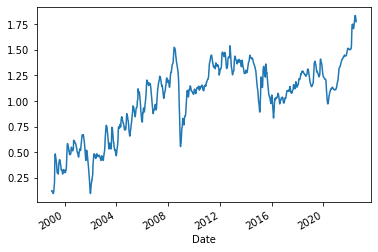

In [11]:
y_log.plot()

In [29]:
# checking the stationarity of the data by using kpss test
from statsmodels.tsa.stattools import kpss
kpss(y)

(3.7787911849396894,
 0.01,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [30]:
kpss(y.diff().dropna())

(0.06466097014218905,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# Modelling Using ARIMA

In [11]:
# mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

In [12]:
# evaluate_arima_model function to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    
    past=[x for x in train]
    # predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = smapi.tsa.arima.ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()
        predictions.append(future)
        past.append(test[i])
    # calculating out of sample error
    error = mean_squared_error(test, predictions)
    # Returning the error
    return error

In [13]:
# The function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # mse variable for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [14]:
#Choosing a couple of values to try for each parameter: p_values, d_values and q_values
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [35]:
# Finally, we can find the optimum ARIMA model for our data.
evaluate_models(y_log,p_values,d_values,q_values)

ARIMA(0, 0, 0) MSE=0.132
ARIMA(0, 0, 1) MSE=0.034
ARIMA(0, 0, 2) MSE=0.011
ARIMA(0, 1, 0) MSE=0.000
ARIMA(0, 1, 1) MSE=0.000
ARIMA(0, 1, 2) MSE=0.000
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 1, 0) MSE=0.000
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(1, 2, 1) MSE=0.000
ARIMA(1, 2, 2) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 0, 2) MSE=0.000
ARIMA(2, 1, 0) MSE=0.000
ARIMA(2, 1, 1) MSE=0.000
ARIMA(2, 1, 2) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.000
ARIMA(2, 2, 2) MSE=0.000
Best ARIMA(2, 2, 2) MSE=0.000


In [15]:
# Split into train and test set
X = y_log.loc[:'2017-10-23'] # First 18 years. From 1999 Jan to 2017 Oct.
y = y_log.loc['2017-10-30':] # Last 5 years. From 2017 Oct. to 2022 July.

# Split the data train, validation and test data.

#X_train = y_log.loc[:'2015-10-26'] # First 16 years
#X_validation = y_log.loc['2015-11-02': '2019-10-21'] # 4 years after train data
X_tr_val = y_log.loc[:'2019-10-21'] # both train and validation

X_test = y_log.loc['2019-10-28': '2022-11-07'] # Test data

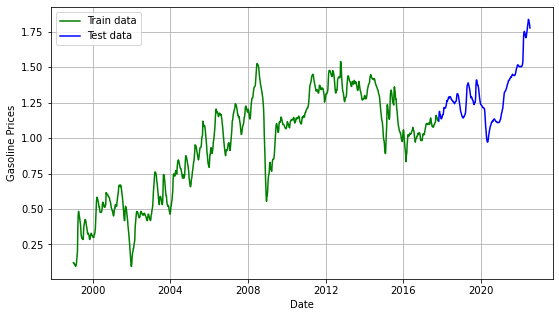

In [37]:
plt.figure(figsize=(9,5))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Gasoline Prices')
plt.plot(X, 'green', label='Train data')
plt.plot(y, 'blue', label='Test data')
plt.legend()
plt.show()

In [16]:
pred=None
def plot_forecast(test=y, pred = pred, name=None):
  print(f'MAPE for {name} model is {round(mean_absolute_percentage_error(y, pred), 3)}')
  plt.figure(figsize=(10,5))
  plt.plot(X.index, X, label='Train Data')
  plt.plot(y.index, y, label='Test Data')
  plt.plot(y.index, pred, label=f'{name} Model Forecast Data')
  plt.legend(loc='best')
  plt.xticks(rotation='vertical')
  plt.title(f'{name} Model for Weekly Data')
  plt.show()

In [17]:
pred=None
forecast=None
def plot_forecast_cv(test=y, pred = pred, forecast=forecast, name=None):
  print(f'MAPE for {name} model is {round(mean_absolute_percentage_error(y, forecast), 3)}')
  plt.figure(figsize=(10,5))
  plt.plot(X.index, X, label='Train Data')
  plt.plot(y.index, y, label='Test Data')
  plt.plot(X.index[10:], pred, label='Predicted Data')
  plt.plot(y.index, forecast, label= f'{name} Model Forecast Data')
  plt.legend(loc='best')
  plt.xticks(rotation='vertical')
  plt.title(f'{name} Model for Weekly Data')
  plt.show()

In [18]:
p=2
d=2
q=2
model = ARIMA(X, order=(p,d,q))
model_fit = model.fit()
forecast1 = model_fit.forecast(len(y))
pred= model_fit.predict()[10:]
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  982
Model:                 ARIMA(2, 2, 2)   Log Likelihood                2461.912
Date:                Thu, 03 Nov 2022   AIC                          -4913.823
Time:                        12:41:27   BIC                          -4889.386
Sample:                             0   HQIC                         -4904.526
                                - 982                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3592      0.025    -14.469      0.000      -0.408      -0.311
ar.L2          0.5938      0.023     26.307      0.000       0.550       0.638
ma.L1         -0.0138      0.058     -0.239      0.8

Based on the outcomes of the tests in the summary, the residuals are not correlated and they are not normally distributed.

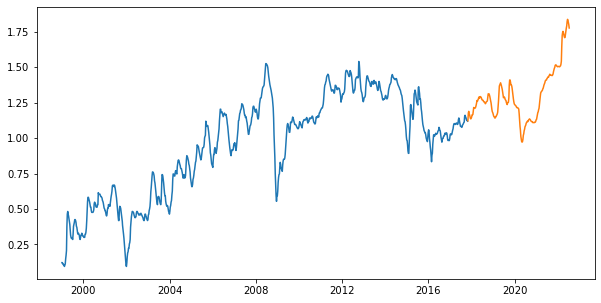

In [20]:
# Declare a variable called forecast_period with the amount of weeks to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = 246
date_range = pd.date_range(y.index[-1], periods = forecast_period, 
              freq='W').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_weeks = pd.DataFrame(date_range, columns = ['Date'])
# Let's now convert the 'Date' column to a datetime object with to_datetime 
future_weeks['Date'] = pd.to_datetime(future_weeks['Date'])
future_weeks.set_index('Date', inplace = True)
future_weeks['Prediction'] = forecast

# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(10,5))
plt.plot(X)
plt.plot(y.append(future_weeks['Prediction']))
plt.show()

MAPE for ARIMA model is 0.1


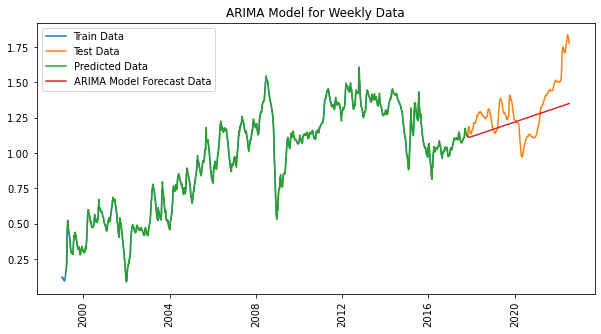

In [19]:
plot_forecast_cv(test=y, pred = pred, forecast = forecast1, name='ARIMA')

In [20]:
# report performance
mse = mean_squared_error(y, forecast1)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, forecast1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, forecast1))
print('RMSE: '+str(rmse))

MSE: 0.028444754692804615
MAE: 0.13520996162883375
RMSE: 0.16865572831304787


# Exponential Smoothing

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #Simple Exponential Smoothing Model
from statsmodels.tsa.api import ExponentialSmoothing # Holt-Winters

In [36]:
# single exponential smoothing

# Build model and forecast
model_fit = SimpleExpSmoothing(np.asarray(X)).fit(smoothing_level=0.8,optimized=False)
pred = model_fit.forecast(len(y))

MAPE for Simple Exponential Smoothing model is 0.134


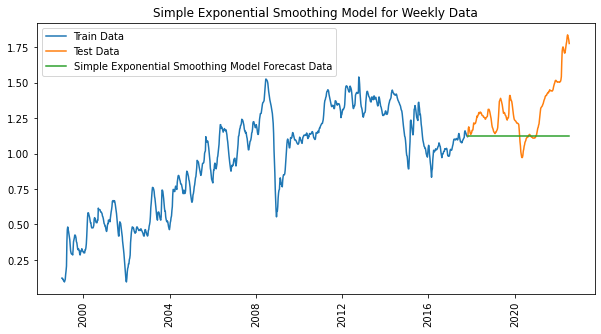

In [37]:
# Plot of forecasting
plot_forecast(test=y, pred = pred, name='Simple Exponential Smoothing')

Holt-Winters Method
The idea behind Holt’s Winters method is to apply exponential smoothing to the seasonal components in addition to level and trend.

In [38]:
# Built and fit model
fitted_model = ExponentialSmoothing(X,trend='add', seasonal_periods=52, seasonal='add').fit()

forecast2 = fitted_model.forecast(len(y))

MAPE for Holt-Winters Method model is 0.814


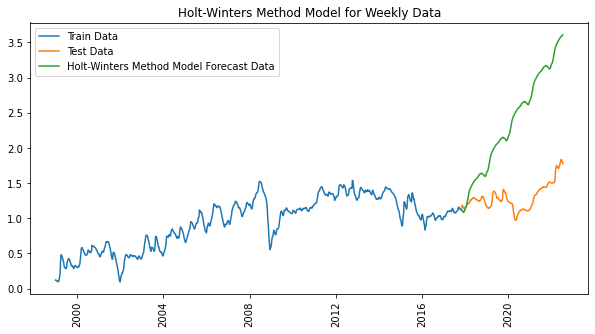

In [39]:
# Plot of forecasting
plot_forecast(test=y, pred = forecast2, name='Holt-Winters Method')

In [40]:
# report performance
mse = mean_squared_error(y, forecast2)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, forecast2)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, forecast2))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred - y)/np.abs(y))
print('MAPE: '+str(mape))

MSE: 1.50091156420457
MAE: 1.0629459830218941
RMSE: 1.2251169593979874
MAPE: 0.13449537623199415


# Modelling Using FBProphet

In [33]:
#pip install prophet
# check prophet version
import prophet
# print version number
#print('Prophet %s' % prophet.__version__)

Prophet 1.1.1


In [34]:
df= pd.read_csv('GasolinePrice.csv')
#selecting the data
df=df[['Date', 'Branded Fuel- Average Retail prices']]

In [35]:
#renaming the target column
df.rename(columns={"Branded Fuel- Average Retail prices": "Price"}, inplace=True)

In [36]:
df = df.rename(columns={'Date': 'ds',
                        'Price': 'y'})

df.head()

,ds,y
0,1/4/1999,$1.13
1,1/11/1999,$1.13
2,1/18/1999,$1.12
3,1/25/1999,$1.12
4,2/1/1999,$1.11


In [37]:
df['ds'] = pd.DatetimeIndex(df['ds'])
df.dtypes

ds    datetime64[ns]
y             object
dtype: object

In [38]:
# convert the columns from dollar value to integer
df[df.columns[1:]] = df[df.columns[1:]].replace('[(\$,)]', '', regex=True).astype(float)

In [39]:
df.head()

,ds,y
0,1999-01-04,1.13
1,1999-01-11,1.13
2,1999-01-18,1.12
3,1999-01-25,1.12
4,1999-02-01,1.11


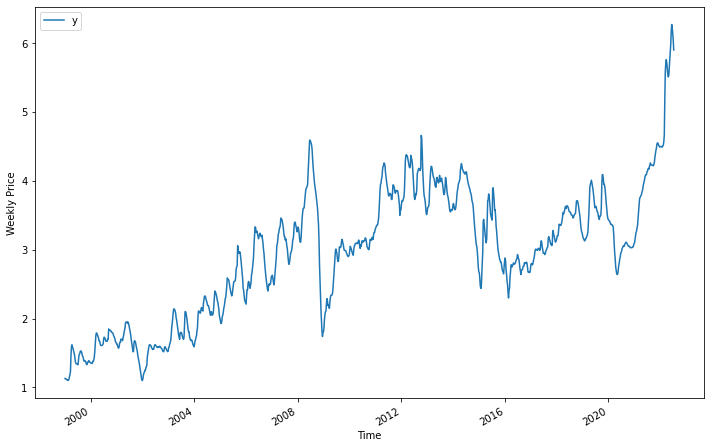

In [40]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Price')
ax.set_xlabel('Time')

plt.show()

In [41]:
# Split train-test data
X = df[df['ds'] < pd.Timestamp('2017-10-30')] # First 18 years
y = df[df['ds'] >= pd.Timestamp('2017-10-30')] # Last 5 years

In [42]:
from prophet import Prophet
my_model=Prophet(interval_width=0.95)
my_model.fit(df)

09:57:59 - cmdstanpy - INFO - Chain [1] start processing
09:57:59 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future_dates = my_model.make_future_dataframe(periods=156, freq='W')
future_dates.tail()

,ds
1379,2025-06-08
1380,2025-06-15
1381,2025-06-22
1382,2025-06-29
1383,2025-07-06


In [44]:
forecast3 = my_model.predict(future_dates)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1999-01-04,1.095296,0.413827,1.885066
1,1999-01-11,1.105516,0.387419,1.837863
2,1999-01-18,1.108683,0.440759,1.911996
3,1999-01-25,1.110713,0.339004,1.883339
4,1999-02-01,1.120500,0.403224,1.826896


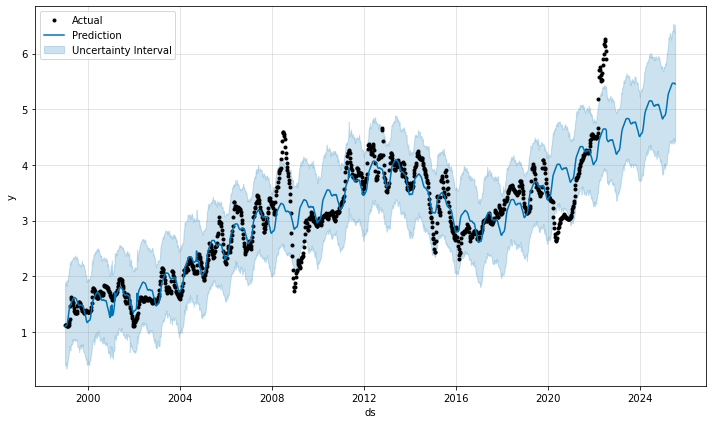

In [45]:
my_model.plot(forecast3, uncertainty=True)
plt.legend(['Actual', 'Prediction', 'Uncertainty Interval'])
plt.show()

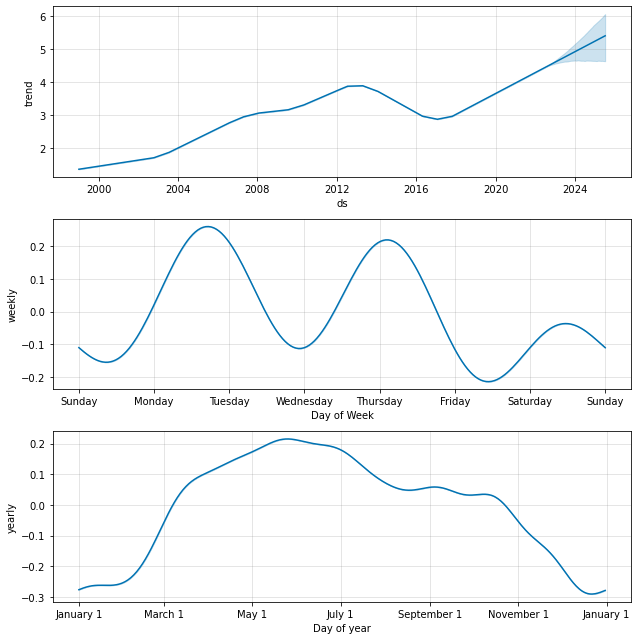

In [46]:
fig1 = my_model.plot_components(forecast3)

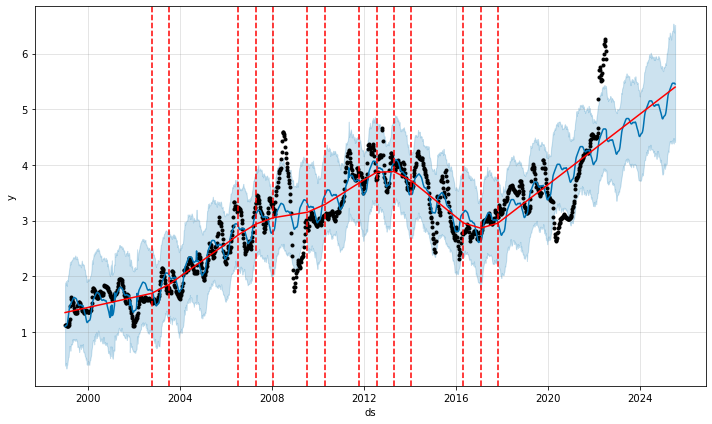

In [47]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast3)

In [48]:
my_model.changepoints

39    1999-10-04
78    2000-07-03
118   2001-04-09
157   2002-01-07
196   2002-10-07
235   2003-07-07
275   2004-04-12
314   2005-01-10
353   2005-10-10
392   2006-07-10
432   2007-04-16
471   2008-01-14
510   2008-10-13
549   2009-07-13
589   2010-04-19
628   2011-01-17
667   2011-10-17
706   2012-07-16
746   2013-04-22
785   2014-01-20
824   2014-10-20
863   2015-07-20
903   2016-04-25
942   2017-01-23
981   2017-10-23
Name: ds, dtype: datetime64[ns]

09:58:23 - cmdstanpy - INFO - Chain [1] start processing
09:58:23 - cmdstanpy - INFO - Chain [1] done processing


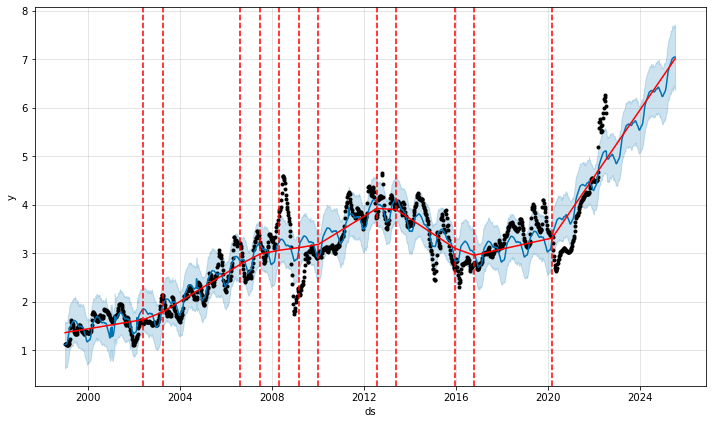

In [49]:
pro_change= Prophet(changepoint_range=0.9)
forecast3 = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast3);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast3)

09:58:26 - cmdstanpy - INFO - Chain [1] start processing
09:58:26 - cmdstanpy - INFO - Chain [1] done processing


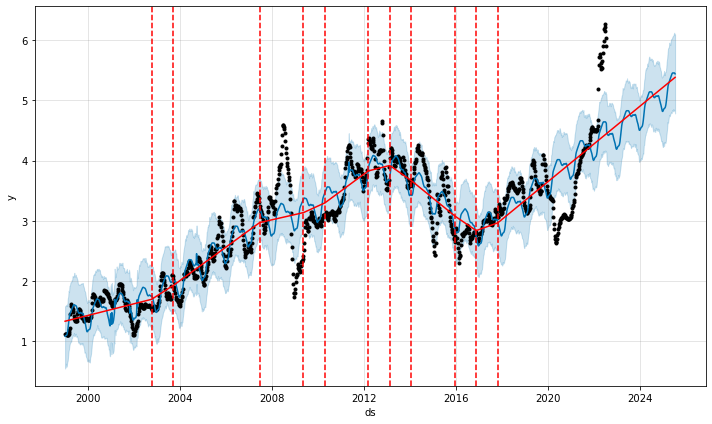

In [50]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast3 = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast3);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast3)

09:58:31 - cmdstanpy - INFO - Chain [1] start processing
09:58:31 - cmdstanpy - INFO - Chain [1] done processing


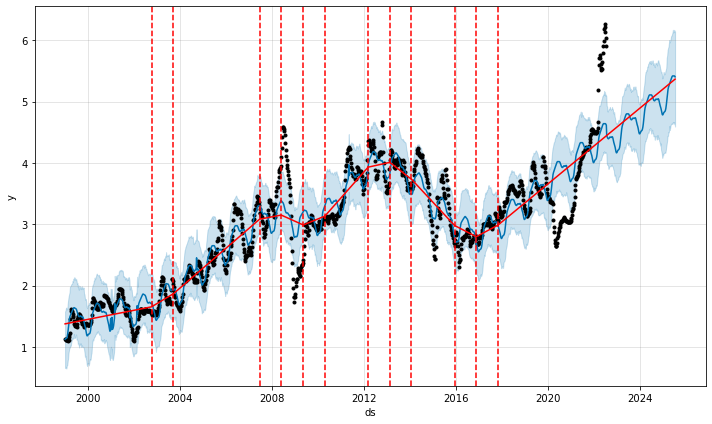

In [51]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast3 = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast3);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast3)

09:58:34 - cmdstanpy - INFO - Chain [1] start processing
09:58:35 - cmdstanpy - INFO - Chain [1] done processing


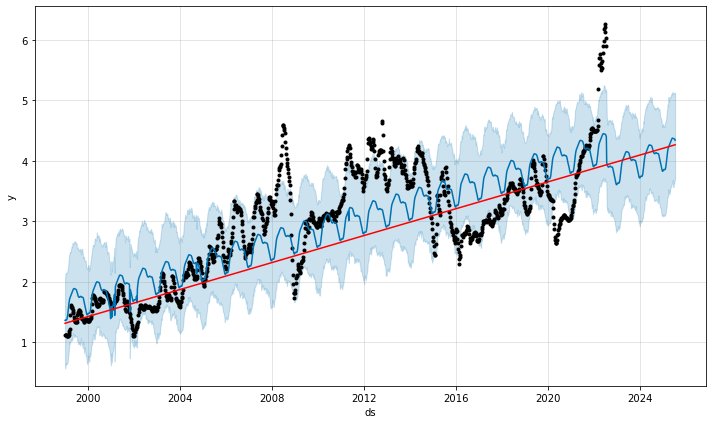

In [52]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast3 = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast3);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast3)


In [53]:
# Evaluate the model based on MAPE
pred = forecast3.iloc[-len(y):]['yhat']
actual = y['y']
print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(actual, pred)}')

Mean Absolute Percentage Error = 0.18142365240979386


In [54]:
# report performance
mse = mean_squared_error(actual, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(actual, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(actual, pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred - actual)/np.abs(actual))
print('MAPE: '+str(mape))

MSE: 0.624758372155772
MAE: 0.6618048075254405
RMSE: 0.7904165814023464
MAPE: 0.13781376904025602


In [ ]:
According to the analysis of three models, ARIMA presents the best model accuracy.